<a href="https://colab.research.google.com/github/Ganesh-DSML/flipitnews/blob/main/FlipitNews_NLP_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FlipItNews

About: The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors.

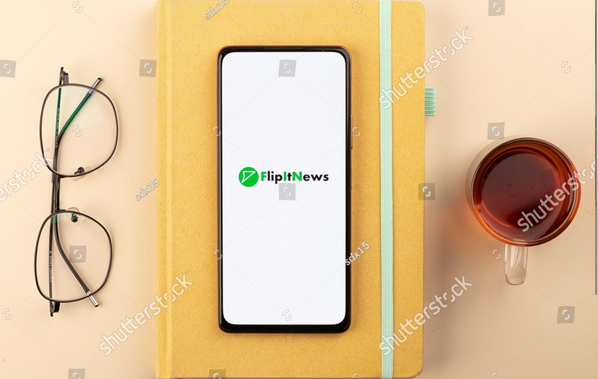

🎯 Objective: Categorize News article from Companyies internal Database using NLP methods to help customers choose the articles of their interest based on their category.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Reading the data

In [2]:
data = 'https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u&export=download'

try:
    df = pd.read_csv(data)
except pd.errors.ParserError:
    df = pd.read_csv(data, sep=';')
    df = pd.read_csv(data, sep='\t')

## Exploring the data

In [3]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


### Shape of the dataset

In [4]:
r = 'No. of Rows'
c = 'No. Of Columns'
print(f'{r}: {df.shape[0]}')
print(f'{c}: {df.shape[1]}')

No. of Rows: 2225
No. Of Columns: 2


### News articles per category

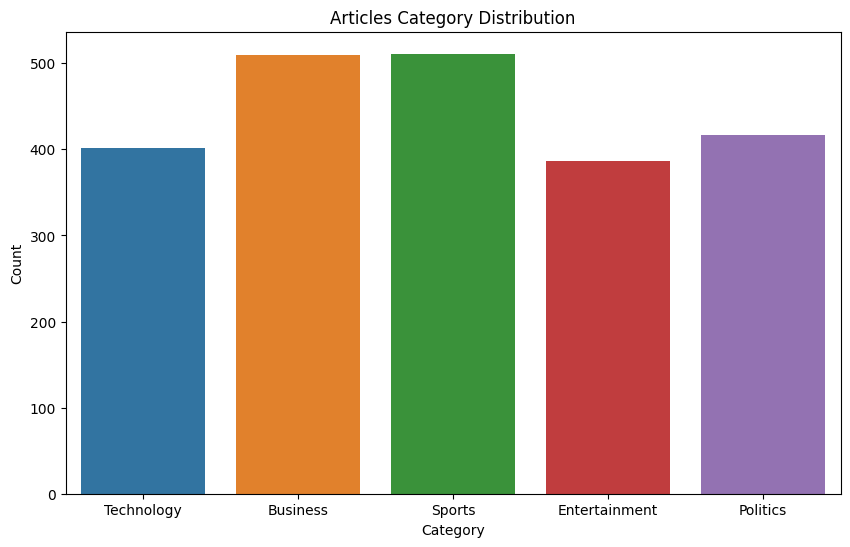

In [5]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = df['Category'], hue = 'Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Articles Category Distribution')
plt.show()

In [6]:
df['Category'].value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


In [7]:
df.duplicated().value_counts()

,count
False,2126
True,99


In [8]:
df.isna().sum().all()

False

In [9]:
df.drop_duplicates(inplace=True)
r = 'No. of Rows'
c = 'No. Of Columns'
print(f'{r}: {df.shape[0]}')
print(f'{c}: {df.shape[1]}')

No. of Rows: 2126
No. Of Columns: 2


In [10]:
df['Category'].value_counts()

,count
Category,
Sports,504
Business,503
Politics,403
Entertainment,369
Technology,347


## Processing the Textual Data

In [11]:
before_preprocessing = df['Article'][1]

In [12]:
import re
stop_words = list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
#data preprocessing
def preprocess_text(text_data):
  text_data = text_data.lower()
  text_data = re.sub('[^a-zA-Z0-9]', " ",text_data) # Removing non-letters
  text_data = nltk.word_tokenize(text_data) # Tokenizing the text
  text_data = [lemmatizer.lemmatize(word) for word in text_data if word not in stop_words] # Removing stopwords and lemmatization
  text_data = ' '.join(text_data)
  return text_data

In [13]:
df['Article_new'] = df['Article'].apply(preprocess_text)
df.head()

,Category,Article,Article_new
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [14]:
after_preprocessing = df['Article_new'][1]

In [15]:
print('Sample Before Preprocessing:')
before_preprocessing

Sample Before Preprocessing:


'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [16]:
print('Sample After Preprocessing:')
after_preprocessing

Sample After Preprocessing:


'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing 11bn 5 8bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed 2002 prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers t

In [17]:
print('List of Preprocessed elements:')
for word in before_preprocessing.split():
  if word not in after_preprocessing.split():
    print(word,end = ' <> ')

List of Preprocessed elements:
boss <> books <> boss <> who <> is <> of <> an <> $11bn <> (£5.8bn) <> decisions <> a <> has <> jurors. <> the <> comments <> under <> by <> lawyers <> who <> have <> been <> that <> was <> not <> for <> s <> problems. <> the <> in <> and <> prosecutors <> that <> losses <> were <> to <> the <> s <> shares. <> has <> to <> and <> is <> prosecutors. <> on <> to <> his <> from <> the <> allegations. <> during <> he <> if <> he <> an <> . <> not <> that <> i <> am <> of <> replied. <> did <> you <> to <> an <> into <> books <> pressed. <> no <> the <> witness. <> has <> that <> he <> entries <> at <> the <> of <> sullivan. <> lawyers <> have <> been <> to <> who <> has <> and <> will <> in <> the <> as <> the <> s <> of <> cards. <> are <> to <> him <> as <> an <> boss <> who <> by <> his <> own <> is <> more <> than <> economist. <> his <> abilities <> from <> a <> into <> a <> $160bn <> telecoms <> and <> of <> the <> 1990s. <> s <> problems <> as <> and <

## Encoding and Transforming the data

### Encoding Target varaible

In [18]:
# Encode Category variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Category'].value_counts()

,count
Category,
3,504
0,503
2,403
1,369
4,347


In [19]:
df.head()

,Category,Article,Article_new
0,4,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,0,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,3,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,1,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


### Bag of Words

In [20]:
#create bag of words
cv = CountVectorizer()
X = cv.fit_transform(df['Article_new']).toarray()

In [21]:
print('Bag of Words Array:')
X

Bag of Words Array:


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF

In [22]:
tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(df['Article_new']).toarray()
y = np.array(df['Category'].values)

In [23]:
print('TF-IDF Input Array: (X)')
X

TF-IDF Input Array: (X)


array([[0.        , 0.01911792, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02395757, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02626591, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0161127 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
print('TF-IDF Target Array: (Y)')
y

TF-IDF Target Array: (Y)


array([4, 0, 3, ..., 1, 2, 3])

### Train-Test Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, stratify = y)
print('Shape of Training Dataset')
print('*'*25)
print('Rows in training dataset: ', x_train.shape[0])
print('Columns in training dataset: ', x_train.shape[1])
print('*'*25)
print('Rows in testing dataset: ', x_test.shape[0])
print('Columns in testing dataset: ', x_test.shape[1])
print('*'*25)
print('Shape of Target Dataset')
print('*'*25)
print('Rows in Target dataset: ', y_train.shape[0])
print('Rows in testing dataset: ', y_test.shape[0])

Shape of Training Dataset
*************************
Rows in training dataset:  1594
Columns in training dataset:  26254
*************************
Rows in testing dataset:  532
Columns in testing dataset:  26254
*************************
Shape of Target Dataset
*************************
Rows in Target dataset:  1594
Rows in testing dataset:  532


## Model Training & Evaluation

### Simple Approach - Naive Bayes

In [26]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [27]:
y_train_pred = nb_model.predict(x_train)
y_test_pred = nb_model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy:', round(acc_train,3))
print('Testing Accuracy:', round(acc_test,3))

Training Accuracy: 0.986
Testing Accuracy: 0.959


In [28]:
print('Train F1 Score:', round(f1_score(y_train,y_train_pred,average='weighted'), 3))
print('Train Recall Score:', round(recall_score(y_train,y_train_pred,average='weighted'), 3))
print('Train Precision Score:', round(precision_score(y_train,y_train_pred,average='weighted'), 3))

print('\nTest F1 Score:', round(f1_score(y_test,y_test_pred,average='weighted'), 3))
print('Test Recall Score:', round(recall_score(y_test,y_test_pred,average='weighted'), 3))
print('Test Precision Score:', round(precision_score(y_test,y_test_pred,average='weighted'), 3))

Train F1 Score: 0.986
Train Recall Score: 0.986
Train Precision Score: 0.986

Test F1 Score: 0.958
Test Recall Score: 0.959
Test Precision Score: 0.96


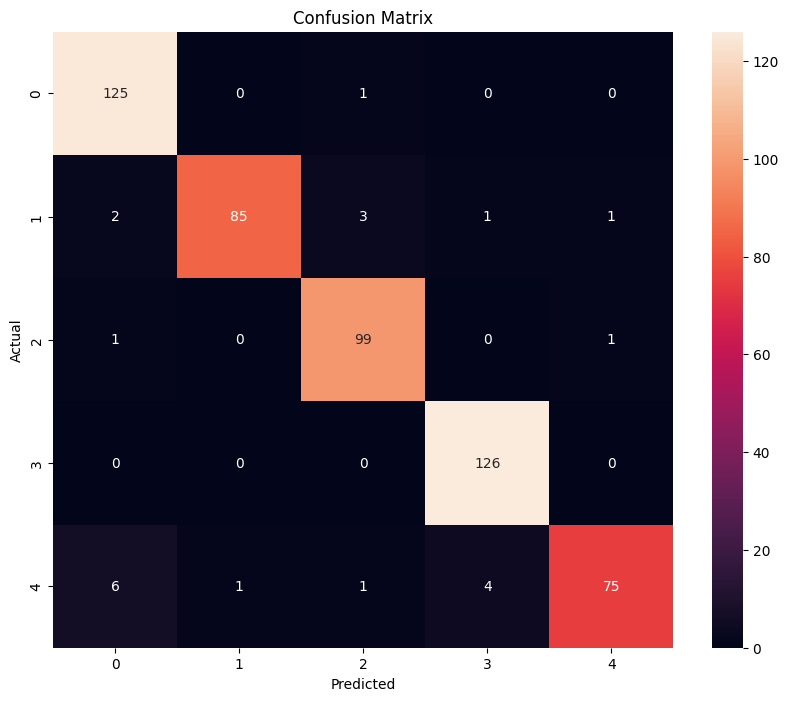

In [29]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       126
           1       0.99      0.92      0.96        92
           2       0.95      0.98      0.97       101
           3       0.96      1.00      0.98       126
           4       0.97      0.86      0.91        87

    accuracy                           0.96       532
   macro avg       0.96      0.95      0.96       532
weighted avg       0.96      0.96      0.96       532



In [31]:
y_train_pred_proba = nb_model.predict_proba(x_train)
y_test_pred_proba = nb_model.predict_proba(x_test)

roc_train = roc_auc_score(y_train, y_train_pred_proba, average='weighted', multi_class='ovr')
roc_test = roc_auc_score(y_test, y_test_pred_proba, average='weighted', multi_class='ovr')

print('Training ROC AUC Score:', round(roc_train, 4))
print('Testing ROC AUC Score:', round(roc_test, 4))

Training ROC AUC Score: 0.9999
Testing ROC AUC Score: 0.9987


### Functional Code

In [32]:
def model_build(rf_model):
  rf_model.fit(x_train, y_train)
  rf_y_train_pred = rf_model.predict(x_train)
  rf_y_test_pred = rf_model.predict(x_test)
  return rf_y_train_pred, rf_y_test_pred

def model_evaluation(rf_model, rf_y_train_pred, rf_y_test_pred):
  rf_acc_train = accuracy_score(y_train, rf_y_train_pred)
  rf_acc_test = accuracy_score(y_test, rf_y_test_pred)
  print('Training Accuracy:', round(rf_acc_train,3))
  print('Testing Accuracy:', round(rf_acc_test,3))
  print('*_*'*25)
  print('Train F1 Score:', round(f1_score(y_train,rf_y_train_pred,average='weighted'), 3))
  print('Train Recall Score:', round(recall_score(y_train,rf_y_train_pred,average='weighted'), 3))
  print('Train Precision Score:', round(precision_score(y_train,rf_y_train_pred,average='weighted'), 3))
  print('*_*'*25)
  print('Test F1 Score:', round(f1_score(y_test,rf_y_test_pred,average='weighted'), 3))
  print('Test Recall Score:', round(recall_score(y_test,rf_y_test_pred,average='weighted'), 3))
  print('Test Precision Score:', round(precision_score(y_test,rf_y_test_pred,average='weighted'), 3))
  print('*_*'*25)

In [33]:
def roc_scores(rf_model):
  rf_y_train_pred_proba = rf_model.predict_proba(x_train)
  rf_y_test_pred_proba = rf_model.predict_proba(x_test)

  roc_train = roc_auc_score(y_train, rf_y_train_pred_proba, average='weighted', multi_class='ovr')
  roc_test = roc_auc_score(y_test, rf_y_test_pred_proba, average='weighted', multi_class='ovr')

  print('Training ROC AUC Score:', round(roc_train, 4))
  print('Testing ROC AUC Score:', round(roc_test, 4))

### Model Building

In [34]:
dtree_model_0  = DecisionTreeClassifier()
rforest_model_0 = RandomForestClassifier()
knn_model_0 = KNeighborsClassifier()

### Decision Tree Classifier

In [35]:
y_train_pred_dt_0, y_test_pred_dt_0 = model_build(dtree_model_0)
model_evaluation(dtree_model_0, y_train_pred_dt_0, y_test_pred_dt_0)
roc_scores(dtree_model_0)

Training Accuracy: 1.0
Testing Accuracy: 0.835
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Train F1 Score: 1.0
Train Recall Score: 1.0
Train Precision Score: 1.0
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Test F1 Score: 0.834
Test Recall Score: 0.835
Test Precision Score: 0.836
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.897


### Random Forest Classifier

In [36]:
y_train_pred_rf_0, y_test_pred_rf_0 = model_build(rforest_model_0)
model_evaluation(rforest_model_0, y_train_pred_rf_0, y_test_pred_rf_0)
roc_scores(rforest_model_0)

Training Accuracy: 1.0
Testing Accuracy: 0.964
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Train F1 Score: 1.0
Train Recall Score: 1.0
Train Precision Score: 1.0
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Test F1 Score: 0.964
Test Recall Score: 0.964
Test Precision Score: 0.965
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.9989


### KNearest Neighbour Classifier

In [37]:
y_train_pred_kn_0, y_test_pred_kn_0 = model_build(knn_model_0)
model_evaluation(knn_model_0, y_train_pred_kn_0, y_test_pred_kn_0)
roc_scores(knn_model_0)

Training Accuracy: 0.955
Testing Accuracy: 0.932
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Train F1 Score: 0.955
Train Recall Score: 0.955
Train Precision Score: 0.956
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Test F1 Score: 0.933
Test Recall Score: 0.932
Test Precision Score: 0.936
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Training ROC AUC Score: 0.9981
Testing ROC AUC Score: 0.9893


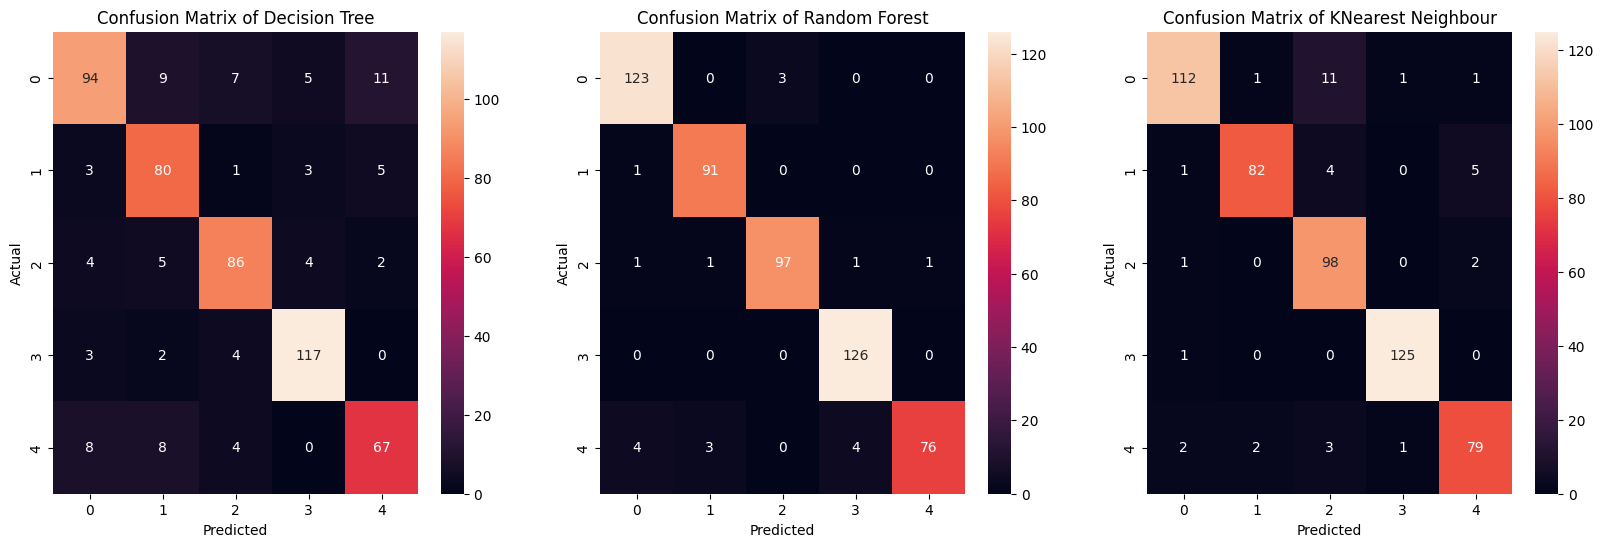

In [38]:
y_pred_classifiers_list = [y_test_pred_dt_0, y_test_pred_rf_0, y_test_pred_kn_0]
models = ['Decision Tree', 'Random Forest', 'KNearest Neighbour']
count = 0
plt.figure(figsize = (20,6))
for i in y_pred_classifiers_list:
  plt.subplot(1,3,count+1)
  conf_matrix = confusion_matrix(y_test, i)
  sns.heatmap(conf_matrix, annot = True, fmt = 'd')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix of {models[count]}')
  count+=1
plt.show()

In [39]:
inp_data = {
    'Naive Bayes' : [0.99,0.966,0.99,0.99,0.99,0.966,0.966,0.967,1,0.998],
    'Decision Tree(Model_0)': [1,0.84,1,1,1,0.843,0.844,0.844,1,0.922],
    'Random Forest(Model_0)': [1,0.95,1,1,1,0.95,0.95,0.951,1,0.998],
    'KNearest Neighbours(Model_0)': [0.959,0.944,0.959,0.959,0.959,0.945,0.944,0.946,0.998,0.992]
}
columns = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score',  'Train Recall', 'Train Precision', 'Test F1 Score','Test Recall','Test Precision', 'Train ROC', 'Test ROC' ]

In [40]:
df = pd.DataFrame(inp_data, index = columns)
df = df.T
df

,Train Accuracy,Test Accuracy,Train F1 Score,Train Recall,Train Precision,Test F1 Score,Test Recall,Test Precision,Train ROC,Test ROC
Naive Bayes,0.990,0.966,0.990,0.990,0.990,0.966,0.966,0.967,1.000,0.998
Decision Tree(Model_0),1.000,0.840,1.000,1.000,1.000,0.843,0.844,0.844,1.000,0.922
Random Forest(Model_0),1.000,0.950,1.000,1.000,1.000,0.950,0.950,0.951,1.000,0.998
KNearest Neighbours(Model_0),0.959,0.944,0.959,0.959,0.959,0.945,0.944,0.946,0.998,0.992


In [41]:
def model_performance(df):
  if df['Train Accuracy'] == 1 and df['Test Accuracy']< df['Train Accuracy'] and df['Test F1 Score'] < df['Train F1 Score'] and df['Test Precision']< df['Train Precision']  and df['Test Recall']< df['Train Recall']:
    return 'Overfitting'
  elif df['Train Accuracy'] and df['Test Accuracy'] < 0.75 and df['Test F1 Score'] < df['Train F1 Score'] and df['Test Precision']< df['Train Precision']  and df['Test Recall']< df['Train Recall']:
    return 'Underfitting'
  else:
    return 'Good Fit'

df['Model_Performance'] = df.apply(model_performance, axis = 1)

In [42]:
df

,Train Accuracy,Test Accuracy,Train F1 Score,Train Recall,Train Precision,Test F1 Score,Test Recall,Test Precision,Train ROC,Test ROC,Model_Performance
Naive Bayes,0.990,0.966,0.990,0.990,0.990,0.966,0.966,0.967,1.000,0.998,Good Fit
Decision Tree(Model_0),1.000,0.840,1.000,1.000,1.000,0.843,0.844,0.844,1.000,0.922,Overfitting
Random Forest(Model_0),1.000,0.950,1.000,1.000,1.000,0.950,0.950,0.951,1.000,0.998,Overfitting
KNearest Neighbours(Model_0),0.959,0.944,0.959,0.959,0.959,0.945,0.944,0.946,0.998,0.992,Good Fit


In [43]:
filtered_df = df[
    (df[['Train Accuracy','Train F1 Score', 'Train Precision', 'Train Recall']] != 1).any(axis=1) &
    (df[['Test Accuracy','Test F1 Score','Test Precision','Test Recall']].values <
     df[['Train Accuracy','Train F1 Score', 'Train Precision','Train Recall']].values).any(axis=1)
]
filtered_df

,Train Accuracy,Test Accuracy,Train F1 Score,Train Recall,Train Precision,Test F1 Score,Test Recall,Test Precision,Train ROC,Test ROC,Model_Performance
Naive Bayes,0.990,0.966,0.990,0.990,0.990,0.966,0.966,0.967,1.000,0.998,Good Fit
KNearest Neighbours(Model_0),0.959,0.944,0.959,0.959,0.959,0.945,0.944,0.946,0.998,0.992,Good Fit


In [44]:
df.drop('Model_Performance', axis = 1, inplace = True)

## Improving model performance

### Decision Tree Classifier - Improved model

In [45]:
dtree_model_1 = DecisionTreeClassifier(ccp_alpha = 0.01)
y_train_pred_dt_1, y_test_pred_dt_1 = model_build(dtree_model_1)
model_evaluation(dtree_model_0, y_train_pred_dt_1, y_test_pred_dt_1)
roc_scores(dtree_model_1)

Training Accuracy: 0.811
Testing Accuracy: 0.799
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Train F1 Score: 0.809
Train Recall Score: 0.811
Train Precision Score: 0.827
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Test F1 Score: 0.795
Test Recall Score: 0.799
Test Precision Score: 0.818
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Training ROC AUC Score: 0.9312
Testing ROC AUC Score: 0.9257


In [46]:
new_row_data = {'Train Accuracy': 0.821, 'Test Accuracy': 0.772, 'Train F1 Score': 0.819, 'Train Recall': 0.821, 'Train Precision': 0.836, 'Test F1 Score': 0.767, 'Test Recall': 0.772, 'Test Precision': 0.787, 'Train ROC': 0.9411, 'Test ROC': 0.9024}
new_df_dt = pd.DataFrame([new_row_data], index=['Decision tree(Model_1)'])
df = pd.concat([df, new_df_dt])

### Random forest Classifier - Improved Model

In [47]:
rforest_model_1 = RandomForestClassifier(class_weight = 'balanced_subsample', ccp_alpha= 0.01)
y_train_pred_rf_1, y_test_pred_rf_1 = model_build(rforest_model_1)
model_evaluation(rforest_model_1, y_train_pred_rf_1, y_test_pred_rf_1)
roc_scores(rforest_model_1)

Training Accuracy: 0.969
Testing Accuracy: 0.966
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Train F1 Score: 0.969
Train Recall Score: 0.969
Train Precision Score: 0.969
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Test F1 Score: 0.966
Test Recall Score: 0.966
Test Precision Score: 0.967
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Training ROC AUC Score: 0.9975
Testing ROC AUC Score: 0.998


In [48]:
new_row_data = {'Train Accuracy': 0.971, 'Test Accuracy': 0.948, 'Train F1 Score': 0.971, 'Train Recall': 0.971, 'Train Precision': 0.971, 'Test F1 Score': 0.948, 'Test Recall': 0.948, 'Test Precision': 0.948, 'Train ROC': 0.9978, 'Test ROC': 0.996}
new_df_rf = pd.DataFrame([new_row_data], index=['Random Forest(Model_1)'])
df = pd.concat([df, new_df_rf])
df['Model_Performance'] = df.apply(model_performance, axis = 1)
df

,Train Accuracy,Test Accuracy,Train F1 Score,Train Recall,Train Precision,Test F1 Score,Test Recall,Test Precision,Train ROC,Test ROC,Model_Performance
Naive Bayes,0.990,0.966,0.990,0.990,0.990,0.966,0.966,0.967,1.0000,0.9980,Good Fit
Decision Tree(Model_0),1.000,0.840,1.000,1.000,1.000,0.843,0.844,0.844,1.0000,0.9220,Overfitting
Random Forest(Model_0),1.000,0.950,1.000,1.000,1.000,0.950,0.950,0.951,1.0000,0.9980,Overfitting
KNearest Neighbours(Model_0),0.959,0.944,0.959,0.959,0.959,0.945,0.944,0.946,0.9980,0.9920,Good Fit
Decision tree(Model_1),0.821,0.772,0.819,0.821,0.836,0.767,0.772,0.787,0.9411,0.9024,Good Fit
Random Forest(Model_1),0.971,0.948,0.971,0.971,0.971,0.948,0.948,0.948,0.9978,0.9960,Good Fit


## Questions

•	How many news articles are present in the dataset that we have?

    Original - 2225
    After Duplicate removal - 2126

•	Most of the news articles are from _____ category.

     Sports Category

•	Only ___ no. of articles belong to the ‘Technology’ category.

    Original - 401
    After Duplicate removal - 347

•	What are Stop Words and why should they be removed from the text data?

    Stop words are common words like "the," "is," "in," "and," or "to" that carry little meaningful information on their own, especially when
    analyzing text data.

    They are typically removed in text preprocessing because they occur frequently across all text and do not contribute
    significantly to the meaning of the text.

    Removing stop words helps reduce the dimensionality of the data, making text analysis more efficient and improving the focus on more
    meaningful words, which are often more relevant for tasks like classification or sentiment analysis.

•	Explain the difference between Stemming and Lemmatization.

    Stemming and lemmatization are both techniques used to reduce words to their base forms, but they differ in their approach.

    Stemming cuts off prefixes or suffixes from words to arrive at a root form, which may not always be a valid word
    (e.g., "running" becomes "run").
    It’s faster but less accurate, and one of its problems is that it can produce non-dictionary words or incorrect stems,
    especially for irregular words (e.g., "better" becomes "bett" or "flying" becomes "fli").

    Lemmatization, on the other hand, involves reducing a word to its lemma, which is its base form that is a valid word in the language
    (e.g., "running" becomes "run" and "better" becomes "good").
    Lemmatization considers the word's meaning and context, making it more accurate but computationally slower.

•	Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

    TF-IDF (Term Frequency-Inverse Document Frequency) is generally considered more efficient than **Bag of Words (BoW)**, especially for tasks
    like text classification or information retrieval.

    BoW simply counts the frequency of words in the document without considering their importance across different documents.

    TF-ID assigns higher weight to words that are frequent in a specific document but rare across the entire corpus.
    
    TF-IDF is more effective at highlighting the most important words and reducing the impact of common, less meaningful words.

•	What’s the shape of train & test data sets after performing a 75:25 split.

    Shape of Training Dataset
    *************************
    Rows in training dataset:  1668
    Columns in training dataset:  26254
    *************************
    Rows in testing dataset:  557
    Columns in testing dataset:  26254
    *************************
    Shape of Target Dataset
    *************************
    Rows in Target dataset:  1668
    Rows in testing dataset:  557

•	Which of the following is found to be the best performing model..

    a. Random Forest b. Nearest Neighbors c. Naive Bayes

    Ans : Naive Bayes and Nearest Neighbour
    Naive Bayes based on F1 Score, Accuracy.
    KNN Based on Balancing performance and avoding overfitting.  
   

•	According to this particular use case, both precision and recall are equally important. (T/F)

    True.
    In the use case of categorizing news articles, both precision and recall are equally important because you want to balance two key factors:

    Precision ensures that the articles classified into a certain category are actually relevant to that category
    (i.e., minimizing false positives).

    Recall ensures that as many relevant articles as possible are correctly identified and categorized
    (i.e., minimizing false negatives).